#***Import Libraries***

In [4]:
import numpy as np
import pandas  as pd
import matplotlib.pyplot as plt
import seaborn as sns

#***Data Observation***

In [5]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

In [6]:
df=pd.read_csv('churn_dataset.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,final_refund_amount,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn_binary
0,7590-VHVEG,Female,0,Yes,No,1.0,0.000000,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34.0,0.000000,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,No,No,2.0,3713.570921,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45.0,0.000000,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2.0,948.889474,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [7]:
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,final_refund_amount,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn_binary
7038,6840-RESVB,Male,0,Yes,Yes,24.0,0.000000,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,0
7039,2234-XADUH,Female,0,Yes,Yes,72.0,0.000000,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,0
7040,4801-JZAZL,Female,0,Yes,Yes,11.0,0.000000,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,0
7041,8361-LTMKD,Male,1,Yes,No,4.0,1251.484031,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,1
7042,3186-AJIEK,Male,0,No,No,66.0,0.000000,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.50,0


In [8]:
#Shap of the dataframe
df.shape

(7043, 22)

In [9]:
#Identify the value_counts of each column and whether it has any null values
cols=list(df.columns)
for col in cols:
  print(df[col].value_counts())
  print("The no of Non-NULL values: ",df[col].count())
  print("No of null values: ",df[col].isna().sum())
  print("Total rows: ",df[col].count()+df[col].isna().sum())
  print("-------------------")


customerID
3186-AJIEK    1
7590-VHVEG    1
5575-GNVDE    1
8775-CEBBJ    1
2823-LKABH    1
             ..
6713-OKOMC    1
1452-KIOVK    1
9305-CDSKC    1
9237-HQITU    1
7795-CFOCW    1
Name: count, Length: 7043, dtype: int64
The no of Non-NULL values:  7043
No of null values:  0
Total rows:  7043
-------------------
gender
Male      3555
Female    3488
Name: count, dtype: int64
The no of Non-NULL values:  7043
No of null values:  0
Total rows:  7043
-------------------
SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64
The no of Non-NULL values:  7043
No of null values:  0
Total rows:  7043
-------------------
Partner
No     3641
Yes    3402
Name: count, dtype: int64
The no of Non-NULL values:  7043
No of null values:  0
Total rows:  7043
-------------------
Dependents
No     4933
Yes    2110
Name: count, dtype: int64
The no of Non-NULL values:  7043
No of null values:  0
Total rows:  7043
-------------------
tenure
1.0     559
72.0    333
2.0     215
3.0     184
4.0     165

In [10]:
print("Range of tenure col: ")
print(df['tenure'].min())
print(df['tenure'].max())

print("Range of Mothly charges col: ")
print(df['MonthlyCharges'].min())
print(df['MonthlyCharges'].max())

print("Range of Total charges col: ")
print(df['TotalCharges'].min())
print(df['TotalCharges'].max())

Range of tenure col: 
0.0
72.0
Range of Mothly charges col: 
18.25
572.25
Range of Total charges col: 
18.8
8684.8


In [11]:
#Looking at the rows where we have no total charges but some monthly charges
df.loc[
    df['TotalCharges'].isna() & df['MonthlyCharges'].notna(), df.columns
]


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,final_refund_amount,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn_binary
488,4472-LVYGI,Female,0,Yes,Yes,0.0,0.0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,0
753,3115-CZMZD,Male,0,No,Yes,0.0,0.0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,0
936,5709-LVOEQ,Female,0,Yes,Yes,0.0,0.0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,0
1082,4367-NUYAO,Male,0,Yes,Yes,0.0,0.0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,0
1340,1371-DWPAZ,Female,0,Yes,Yes,0.0,0.0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,0
3331,7644-OMVMY,Male,0,Yes,Yes,0.0,0.0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,0
3826,3213-VVOLG,Male,0,Yes,Yes,0.0,0.0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,0
4380,2520-SGTTA,Female,0,Yes,Yes,0.0,0.0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,0
5218,2923-ARZLG,Male,0,Yes,Yes,0.0,0.0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,0
6670,4075-WKNIU,Female,0,Yes,Yes,0.0,0.0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,0


#***Data preprocessing***

In [12]:
# 0 tenure doesnt add much useful information to the churn prediction.
# since 11 rows is approx 0.16% of the data so drop them.
df=df[~(df['MonthlyCharges'].notna()&df['TotalCharges'].isna())]

In [13]:
# new shape of the dataframe 11 rows dropped
df.shape

(7032, 22)

***Splitting the data***

In [14]:
y=df['Churn_binary']

In [15]:
X=df.drop(columns=['Churn_binary','customerID'])

In [16]:
print(y.shape)
print(X.shape)

(7032,)
(7032, 20)


In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,stratify=y,random_state=42)

***Converting the columns which require binary encoding into:***


1.   yes:1
2.   no:0
3.   male:1
4.   female:0



In [18]:
binary_cols=[col for col in X_train.columns if X_train[col].dtype=='object' and X_train[col].nunique()==2]
binary_mapping={
    'Yes':1,'No':0,'Male':1,'Female':0
}
for col in binary_cols:
  X_train[col]=X_train[col].map(binary_mapping)
  X_test[col]=X_test[col].map(binary_mapping)

In [19]:
X_train.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,final_refund_amount,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
1413,1,0,1,1,65.0,0.0,1,Yes,Fiber optic,Yes,Yes,Yes,Yes,No,No,Two year,0,Credit card (automatic),94.55,6078.75
7003,1,0,0,0,26.0,0.0,0,No phone service,DSL,No,No,Yes,Yes,No,No,Month-to-month,0,Electronic check,35.75,1022.50
3355,0,0,1,0,68.0,0.0,1,Yes,Fiber optic,No,Yes,Yes,Yes,No,No,Two year,0,Credit card (automatic),90.20,6297.65
4494,1,0,0,0,3.0,0.0,1,No,Fiber optic,No,Yes,No,No,No,Yes,Month-to-month,0,Electronic check,84.30,235.05
3541,0,0,1,0,49.0,0.0,0,No phone service,DSL,Yes,No,No,No,Yes,No,Month-to-month,0,Bank transfer (automatic),40.65,2070.75


***Inspecting the Tenure column***

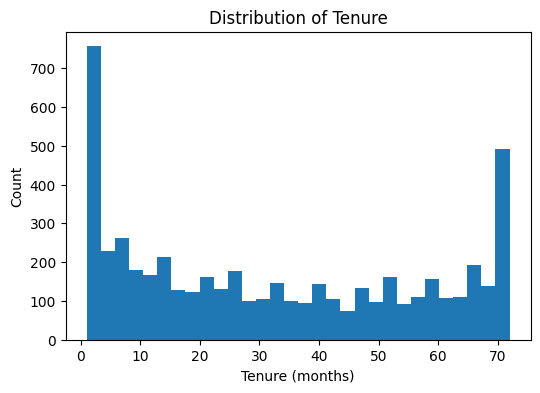

In [20]:
plt.figure(figsize=(6,4))
plt.hist(X_train['tenure'], bins=30)
plt.xlabel('Tenure (months)')
plt.ylabel('Count')
plt.title('Distribution of Tenure')
plt.show()

The above histogram suggests that the customers at the instant of data collection are higher at the early tenure but dissappear at as the time passes by since low no of customers happen to be at intermediate tenure.


In [21]:
print(X_train['tenure'].isna().sum())
print(X_test['tenure'].isna().sum())

438
125


In [22]:
#Impute the Nan values using the median
tenure_median = X_train['tenure'].median()
X_train['tenure'] = X_train['tenure'].fillna(tenure_median)
X_test['tenure']  = X_test['tenure'].fillna(tenure_median)

In [23]:
print(X_train['tenure'].isna().sum())
print(X_test['tenure'].isna().sum())

0
0


In [24]:
#Scale the tenure column
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

X_train['tenure']=scaler.fit_transform(X_train[['tenure']])
X_test['tenure']=scaler.transform(X_test[['tenure']])


In [25]:
X_train.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,final_refund_amount,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
1413,1,0,1,1,1.391729,0.0,1,Yes,Fiber optic,Yes,Yes,Yes,Yes,No,No,Two year,0,Credit card (automatic),94.55,6078.75
7003,1,0,0,0,-0.263654,0.0,0,No phone service,DSL,No,No,Yes,Yes,No,No,Month-to-month,0,Electronic check,35.75,1022.50
3355,0,0,1,0,1.519066,0.0,1,Yes,Fiber optic,No,Yes,Yes,Yes,No,No,Two year,0,Credit card (automatic),90.20,6297.65
4494,1,0,0,0,-1.239905,0.0,1,No,Fiber optic,No,Yes,No,No,No,Yes,Month-to-month,0,Electronic check,84.30,235.05
3541,0,0,1,0,0.712597,0.0,0,No phone service,DSL,Yes,No,No,No,Yes,No,Month-to-month,0,Bank transfer (automatic),40.65,2070.75


***Inspecting the final_refund_amount column***

In [26]:
X_train['final_refund_amount'].value_counts()

,count
final_refund_amount,
0.000000,4036
2440.079148,1
1007.377548,1
3112.237769,1
2061.565232,1
...,...
308.309656,1
531.420350,1
3868.988779,1


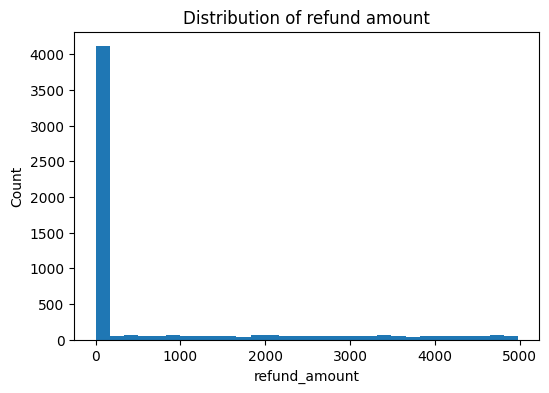

In [27]:
plt.figure(figsize=(6,4))
plt.hist(X_train['final_refund_amount'], bins=30)
plt.xlabel('refund_amount')
plt.ylabel('Count')
plt.title('Distribution of refund amount')
plt.show()

In [28]:
#The refund_amount is a consequence of churn and not a driving feature for it.
#Also the data is heavily right skewed so it's better we drop the column.
X_train=X_train.drop(columns=['final_refund_amount'])

In [29]:
X_test=X_test.drop(columns=['final_refund_amount'])

In [30]:
X_train.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
1413,1,0,1,1,1.391729,1,Yes,Fiber optic,Yes,Yes,Yes,Yes,No,No,Two year,0,Credit card (automatic),94.55,6078.75
7003,1,0,0,0,-0.263654,0,No phone service,DSL,No,No,Yes,Yes,No,No,Month-to-month,0,Electronic check,35.75,1022.50
3355,0,0,1,0,1.519066,1,Yes,Fiber optic,No,Yes,Yes,Yes,No,No,Two year,0,Credit card (automatic),90.20,6297.65
4494,1,0,0,0,-1.239905,1,No,Fiber optic,No,Yes,No,No,No,Yes,Month-to-month,0,Electronic check,84.30,235.05
3541,0,0,1,0,0.712597,0,No phone service,DSL,Yes,No,No,No,Yes,No,Month-to-month,0,Bank transfer (automatic),40.65,2070.75


***Now we will convert all the columns that require One hot encoding***

In [31]:
ohe_cols=[col for col in X_train.columns if X_train[col].dtype=='object'and X_train[col].nunique()>2]
X_train=pd.get_dummies(X_train,columns=ohe_cols,drop_first=True)
X_test=pd.get_dummies(X_test,columns=ohe_cols,drop_first=True)

X_train,X_test=X_train.align(X_test,join='left',axis=1,fill_value=0)

In [32]:
X_train.shape

(5625, 30)

***Looking at the Monthly charges column and the Total Charges Column***
Drop the Total charges column since it is highly correlated to monthly charges.

***Total Charges= Monthly Charges*** * ***Tenure***

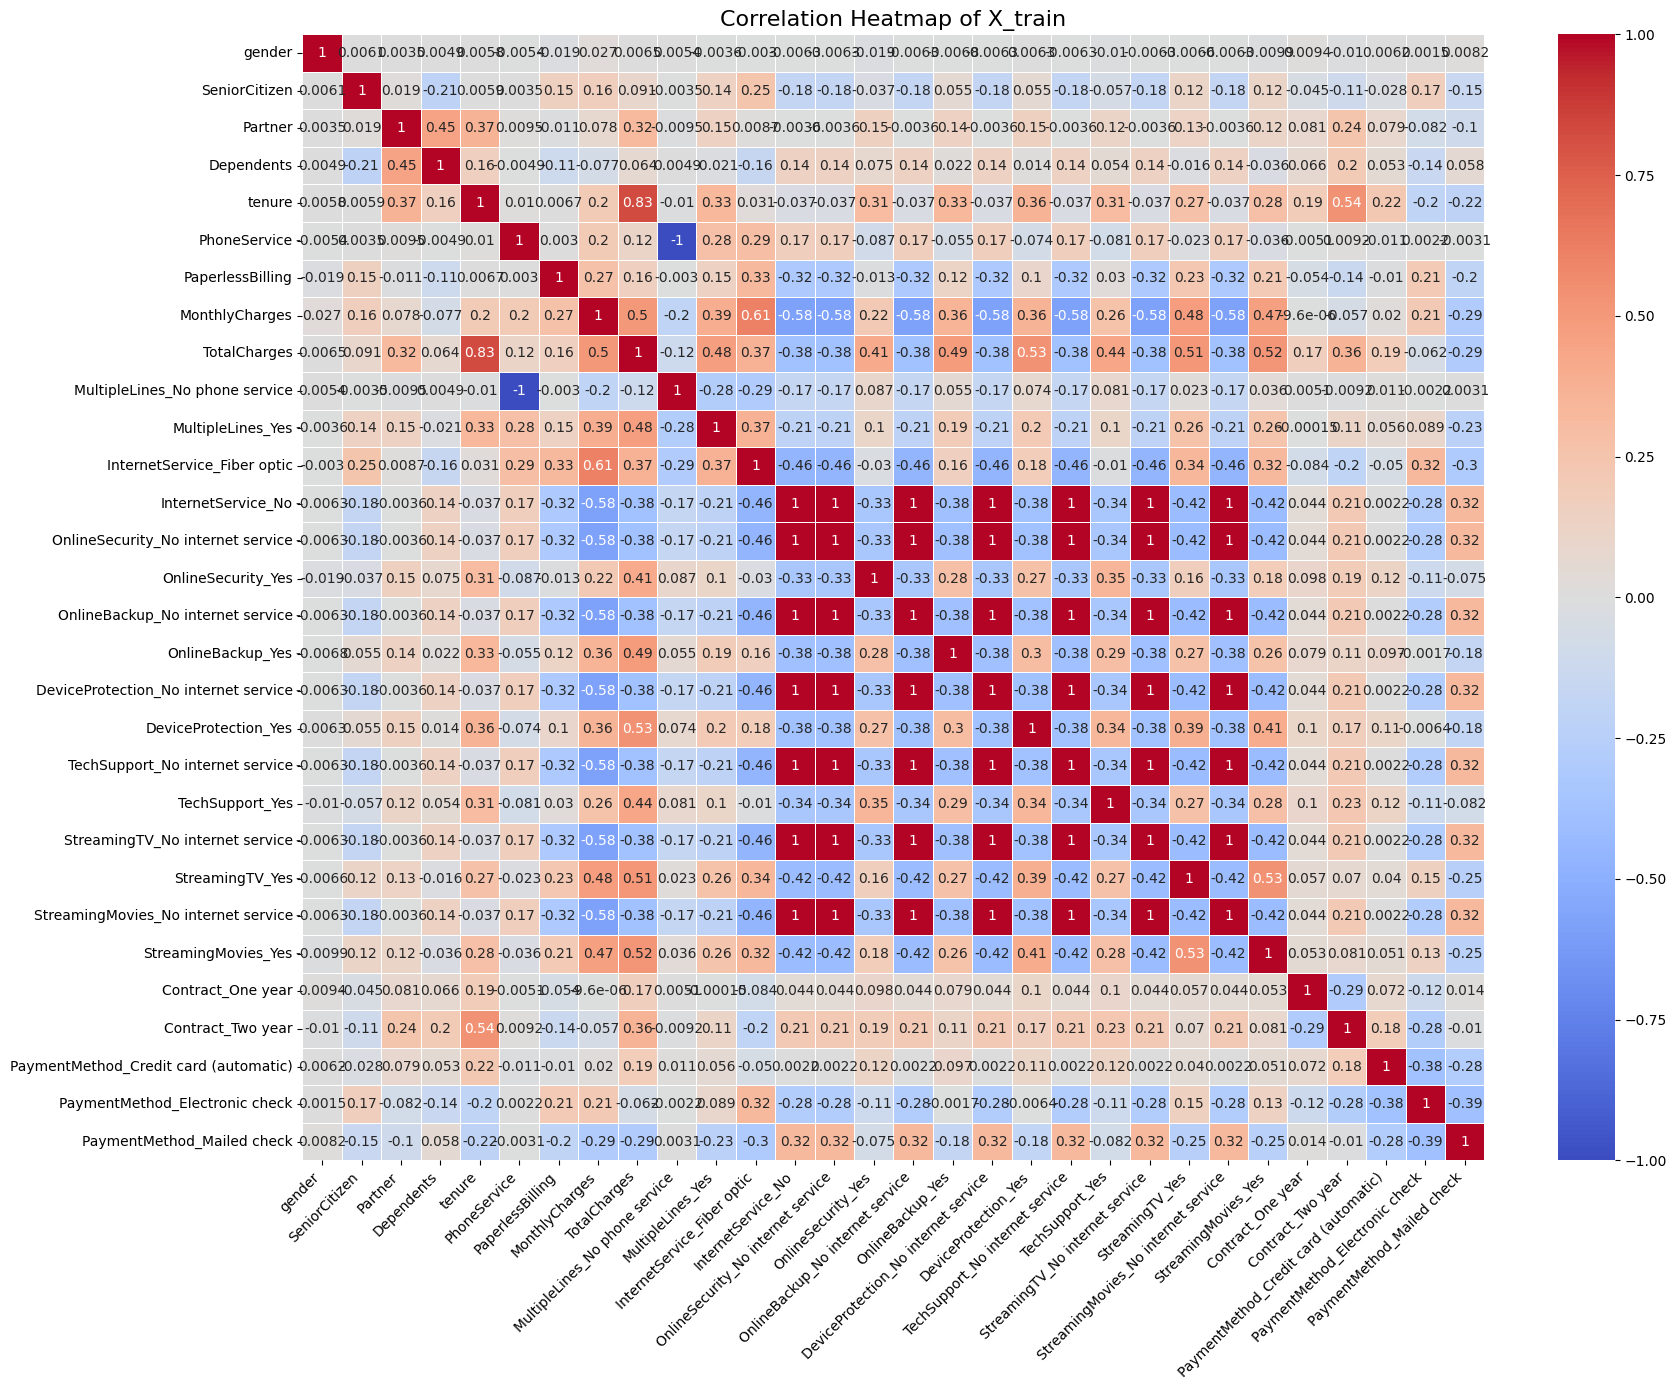

In [33]:
# We can observe from the sns heatmap that the Monthly charges and total charges
# are highly corelated
corr = X_train.corr()

# plot heatmap
plt.figure(figsize=(18, 14))
sns.heatmap(
    corr,
    cmap='coolwarm',
    annot=True,          # set True only if you want numbers (can get cluttered)
    linewidths=0.5
)

plt.title('Correlation Heatmap of X_train', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [34]:
X_train=X_train.drop(columns=['TotalCharges'])
X_test=X_test.drop(columns=['TotalCharges'])

In [35]:
X_train['MonthlyCharges'].max()

571.5

In [36]:
X_train['MonthlyCharges'].min()

18.4

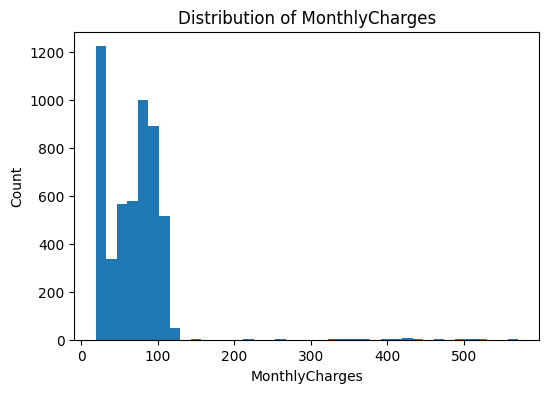

In [37]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.hist(X_train['MonthlyCharges'], bins=40)
plt.xlabel('MonthlyCharges')
plt.ylabel('Count')
plt.title('Distribution of MonthlyCharges')
plt.show()

In [38]:
# Since the data is right skewed heavily, we need to log transform it
#But first we check for null values
print(X_train['MonthlyCharges'].isna().sum())
print(X_test['MonthlyCharges'].isna().sum())

438
125


In [39]:
#Filling the null values with median
mc_median=X_train['MonthlyCharges'].median()
X_train['MonthlyCharges']=X_train['MonthlyCharges'].fillna(mc_median)
X_test['MonthlyCharges']=X_test['MonthlyCharges'].fillna(mc_median)

In [40]:
#Log transforming the monthly charges column
X_train['MonthlyCharges']=np.log1p(X_train['MonthlyCharges'])
X_test['MonthlyCharges']=np.log1p(X_test['MonthlyCharges'])


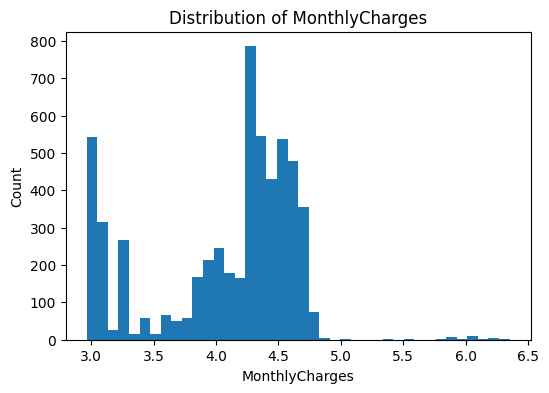

In [41]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.hist(X_train['MonthlyCharges'], bins=40)
plt.xlabel('MonthlyCharges')
plt.ylabel('Count')
plt.title('Distribution of MonthlyCharges')
plt.show()

In [42]:
scaler_mc=StandardScaler()
X_train['MonthlyCharges']=scaler_mc.fit_transform(X_train[['MonthlyCharges']])
X_test['MonthlyCharges']=scaler_mc.transform(X_test[['MonthlyCharges']])

***The columns which depend on phone services and Internet services are redundant for example the MultipleLines_No phone service	column would be zero if phoneservice is 0 hence its not adding any new information. we will have to drop all such columns.***

In [43]:
#removing the redundant columns
cols_to_drop = [
    'MultipleLines_No phone service',
    'OnlineSecurity_No internet service',
    'OnlineBackup_No internet service',
    'DeviceProtection_No internet service',
    'TechSupport_No internet service',
    'StreamingTV_No internet service',
    'StreamingMovies_No internet service'
]
X_train = X_train.drop(columns=cols_to_drop)
X_test  = X_test.drop(columns=cols_to_drop)

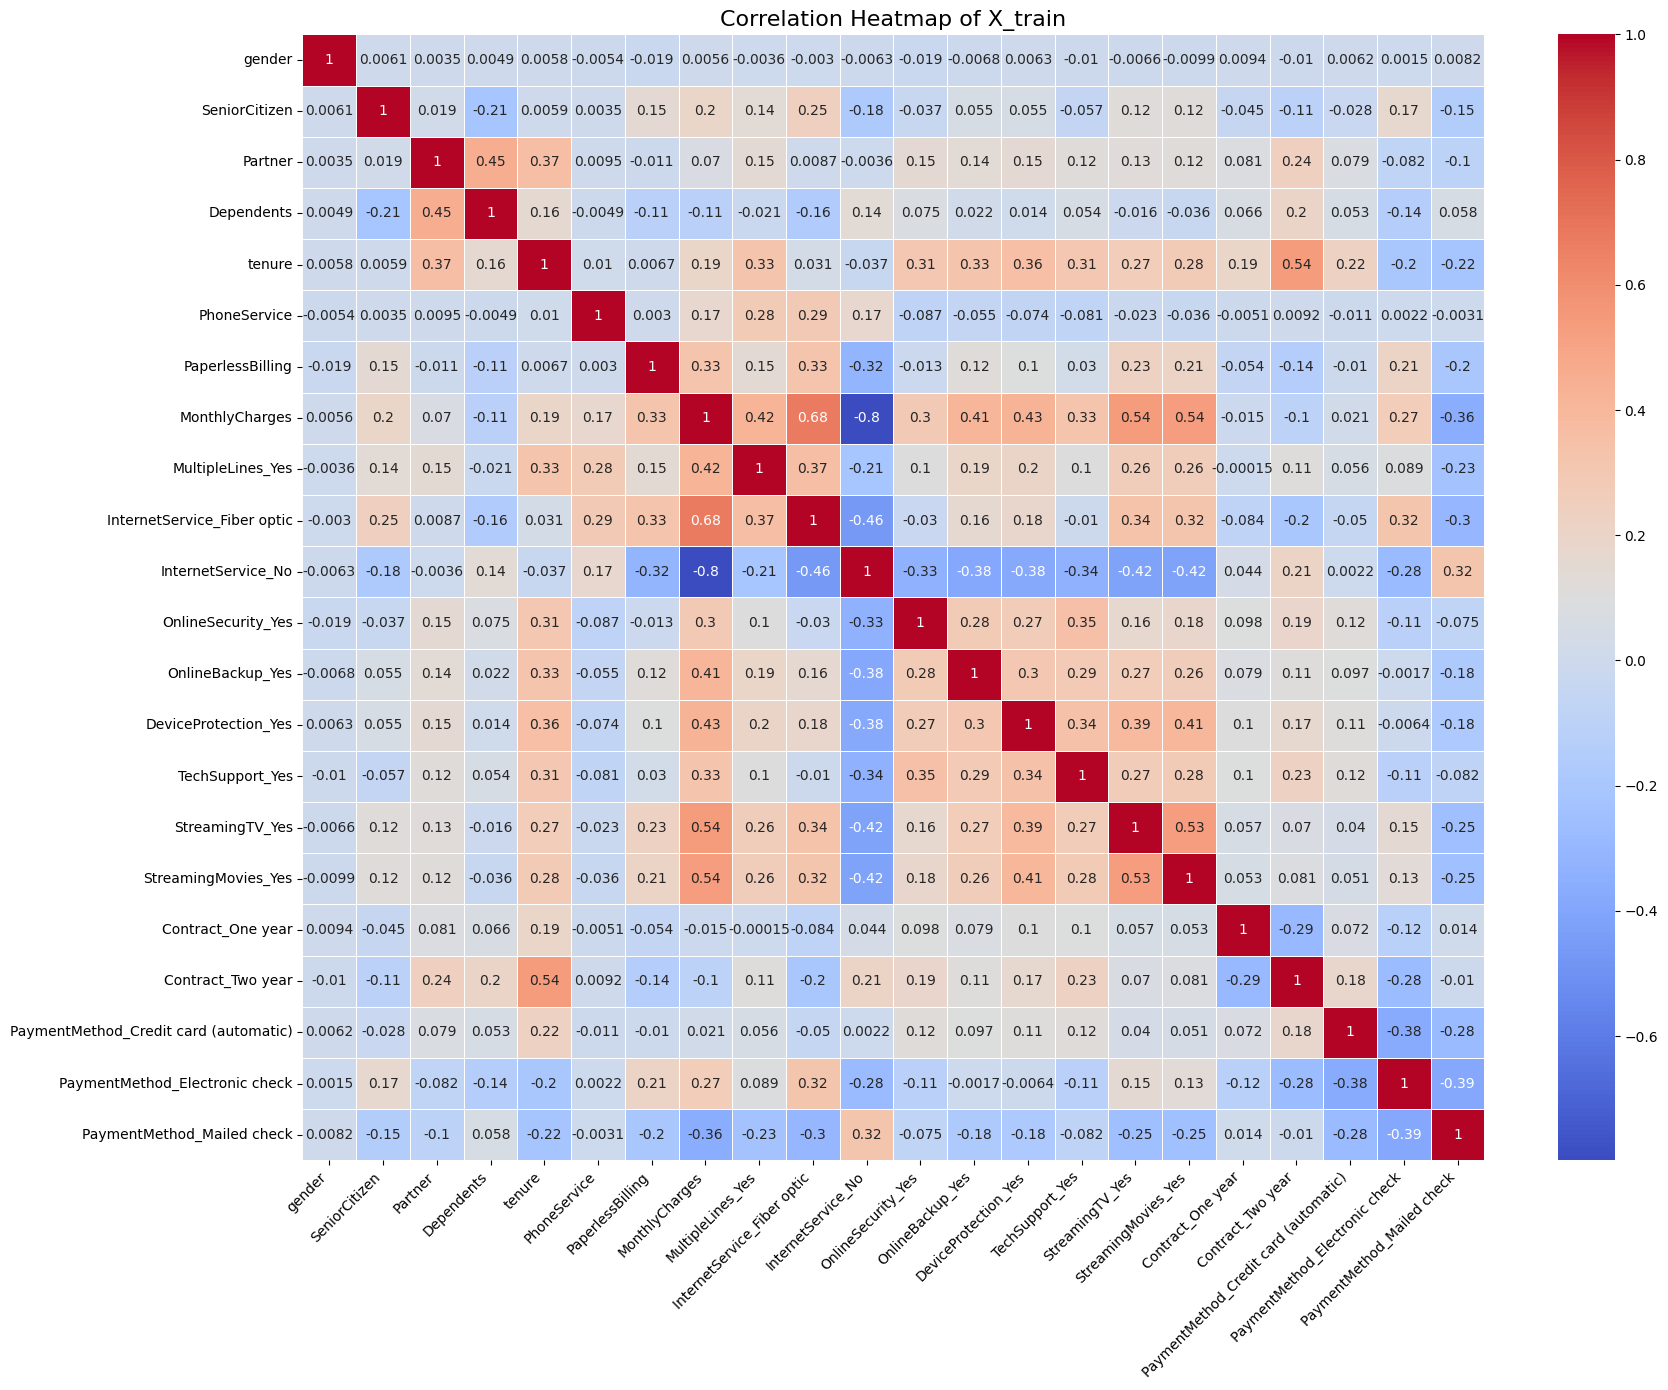

In [44]:
#Now taking alook at the heatmap again
# We can observe from the sns heatmap that the Monthly charges and total charges
# are highly corelated
corr = X_train.corr()

# plot heatmap
plt.figure(figsize=(18, 14))
sns.heatmap(
    corr,
    cmap='coolwarm',
    annot=True,          # set True only if you want numbers (can get cluttered)
    linewidths=0.5
)

plt.title('Correlation Heatmap of X_train', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

***Final Model ready for training***

In [45]:
X_train.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
1413,1,0,1,1,1.391729,1,0,0.838852,True,True,False,True,True,True,True,False,False,False,True,True,False,False
7003,1,0,0,0,-0.263654,0,0,-0.816473,False,False,False,False,False,True,True,False,False,False,False,False,True,False
3355,0,0,1,0,1.519066,1,0,0.758131,True,True,False,False,True,True,True,False,False,False,True,True,False,False
4494,1,0,0,0,-1.239905,1,0,0.642268,False,True,False,False,True,False,False,False,True,False,False,False,True,False
3541,0,0,1,0,0.712597,0,0,-0.599641,False,False,False,True,False,False,False,True,False,False,False,False,False,False


In [46]:
X_test.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
974,0,0,1,1,1.137055,1,1,0.463798,False,False,False,False,True,False,True,True,True,False,True,True,False,False
619,0,0,0,0,-1.070122,1,1,0.521366,True,True,False,False,True,False,False,False,False,False,False,False,False,False
4289,0,0,0,0,0.924826,1,0,-1.777719,False,False,True,False,False,False,False,False,False,False,True,False,False,True
3721,0,0,0,0,-1.282351,1,0,-1.733141,False,False,True,False,False,False,False,False,False,False,False,False,False,True
4533,0,0,1,0,1.646403,1,1,1.021106,True,True,False,False,True,True,False,True,True,False,True,False,False,False


#***Model Training(Logistic Regression)***

In [47]:
# Logistic regression with cross validation and ROC-AUC comparison.
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold, cross_val_score

lr_model=LogisticRegression(max_iter=1000,class_weight='balanced',random_state=42)
cv=StratifiedKFold(n_splits=5,shuffle=True,random_state=42)
lr_model_cv_scores=cross_val_score(lr_model,X_train,y_train,cv=cv,scoring='roc_auc')

print("LR CV ROC-AUC:", lr_model_cv_scores.mean())


LR CV ROC-AUC: 0.8412290362548284


In [48]:
lr_model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

In [49]:
#Lets see the important features which drive the churn prediction
coef_df = pd.DataFrame({
    'feature': X_train.columns,
    'coefficient': lr_model.coef_[0]
})
coef_df['abs_coefficient'] = coef_df['coefficient'].abs()
coef_df = coef_df.sort_values(by='abs_coefficient', ascending=False)

coef_df.head(22)
#we do observe that the -ve values of coeff suggests that the churn reduces. +ve values increase the churn risk
#Contract_Two year has the highest driving force

,feature,coefficient,abs_coefficient
18,Contract_Two year,-1.648264,1.648264
17,Contract_One year,-0.905798,0.905798
9,InternetService_Fiber optic,0.861997,0.861997
10,InternetService_No,-0.787080,0.787080
4,tenure,-0.608477,0.608477
5,PhoneService,-0.464088,0.464088
20,PaymentMethod_Electronic check,0.456555,0.456555
11,OnlineSecurity_Yes,-0.402513,0.402513
14,TechSupport_Yes,-0.341902,0.341902
15,StreamingTV_Yes,0.280247,0.280247


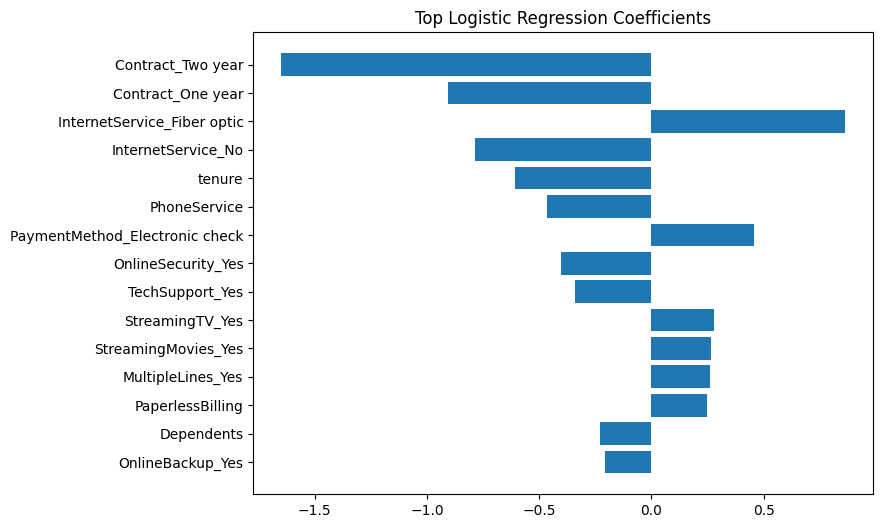

In [50]:
import matplotlib.pyplot as plt

top_n = 15
plt.figure(figsize=(8,6))
plt.barh(
    coef_df['feature'].head(top_n),
    coef_df['coefficient'].head(top_n)
)
plt.gca().invert_yaxis()
plt.title('Top Logistic Regression Coefficients')
plt.show()

In [51]:
#testing this baseline LR model on test set
from sklearn.metrics import roc_auc_score

lr_base_test_proba = lr_model.predict_proba(X_test)[:, 1]
lr_base_test_auc = roc_auc_score(y_test, lr_base_test_proba)

print("Baseline LR Test ROC-AUC:", lr_base_test_auc)

Baseline LR Test ROC-AUC: 0.8265694643605924


#***Model Training(XGBoost)***

In [52]:
#training the xgboost
import xgboost as xgb
xgb_base=xgb.XGBClassifier(
    n_estimators=1000,
    learning_rate=0.1,
    max_depth=3,
    random_state=42,
    eval_metrics='logloss',
    use_label_encoder=False
)
# XGboost with cross validation and ROC-AUC comparison.

from sklearn.model_selection import StratifiedKFold, cross_val_score

cv=StratifiedKFold(n_splits=5,shuffle=True,random_state=42)
xgb_base_cv_scores=cross_val_score(xgb_base,X_train,y_train,cv=cv,scoring='roc_auc')

print("XGB baseline ROC-AUC:", xgb_base_cv_scores)
print("Mean CV ROC-AUC:", xgb_base_cv_scores.mean())

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [16:57:22] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "eval_metrics", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [16:57:23] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "eval_metrics", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [16:57:24] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "eval_metrics", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [16:57:25] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "eval_metrics", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packa

XGB baseline ROC-AUC: [0.82273235 0.82261696 0.82835643 0.8250909  0.82108845]
Mean CV ROC-AUC: 0.8239770178237386


In [53]:
xgb_base.fit(X_train, y_train)
xgb_base_test_proba = xgb_base.predict_proba(X_test)[:, 1]
xgb_base_test_auc = roc_auc_score(y_test, xgb_base_test_proba)
print("XGBoost Baseline Test ROC-AUC:", xgb_base_test_auc)

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [16:57:26] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "eval_metrics", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Baseline Test ROC-AUC: 0.8141038251083237


#***Hyperparameter Tuning for Logistic regression***

In [54]:
#defining the parameter grid and performing the hyperparamter tuning
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold, cross_val_score, GridSearchCV

lr =LogisticRegression(max_iter=1000,class_weight='balanced',solver='liblinear')


param_grid_lr = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2']
}
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

lr_tuned= GridSearchCV(
    estimator=lr,
    param_grid=param_grid_lr,
    scoring='roc_auc',
    cv=cv,
    n_jobs=-1,
    verbose=1
)

lr_tuned.fit(X_train, y_train)
print("Best LR params:", lr_tuned.best_params_)
print("Best LR CV ROC-AUC:", lr_tuned.best_score_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best LR params: {'C': 0.1, 'penalty': 'l1'}
Best LR CV ROC-AUC: 0.8417412359195705


In [55]:
best_lr=lr_tuned.best_estimator_
from sklearn.metrics import roc_auc_score

lr_test_proba = best_lr.predict_proba(X_test)[:, 1]
test_auc = roc_auc_score(y_test, lr_test_proba)

print("Tuned LR Test ROC-AUC:", test_auc)

Tuned LR Test ROC-AUC: 0.8278196520181601


#***Hyperparameter Tuning for XGBoost***

In [62]:
from sklearn.metrics import confusion_matrix, classification_report,precision_score,recall_score,f1_score
import xgboost as xgb
xgb_model = xgb.XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    random_state=42,
    use_label_encoder=False
)

param_grid_xgb = {
    'n_estimators': [100, 200],
    'max_depth': [3, 4],
    'learning_rate': [0.05, 0.1],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid_xgb = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid_xgb,
    scoring='roc_auc',
    cv=cv,
    n_jobs=-1,
    verbose=1
)

grid_xgb.fit(X_train, y_train)
print("Best XGB parameters:", grid_xgb.best_params_)
print("Best XGB CV ROC-AUC:", grid_xgb.best_score_)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
Best XGB parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}
Best XGB CV ROC-AUC: 0.845927101638229


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [17:18:28] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


#***Assesing the model performance based on Confusion Matrix, Roc-Auc score, precision, Recall and F1 score.***

In [69]:
best_xgb = grid_xgb.best_estimator_

xgb_test_proba = best_xgb.predict_proba(X_test)[:, 1]
xgb_test_pred = (xgb_test_proba >= 0.5).astype(int)
xgb_test_auc = roc_auc_score(y_test, xgb_test_proba)
print("Tuned XGBoost Test ROC-AUC:", xgb_test_auc)
cm = confusion_matrix(y_test, xgb_test_pred)
print("Confusion Matrix:\n", cm)
print(classification_report(y_test, xgb_test_pred))


Tuned XGBoost Test ROC-AUC: 0.8345364987498124
Confusion Matrix:
 [[928 105]
 [190 184]]
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1033
           1       0.64      0.49      0.56       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407



The initial evaluation using the default threshold of 0.5 showed limited effectiveness in identifying churners, yielding a precision of 0.64 and a recall of 0.49. Since this threshold did not provide an optimal trade-off between false positives and false negatives, threshold optimization was performed by analyzing F1-scores across different threshold values.

In [65]:
thresholds = np.arange(0.1, 0.9, 0.01)

precision_list = []
recall_list = []
f1_list = []

for t in thresholds:
    xgb_pred_t = (xgb_test_proba >= t).astype(int)
    precision_list.append(precision_score(y_test, xgb_pred_t,zero_division=0))
    recall_list.append(recall_score(y_test, xgb_pred_t,zero_division=0))
    f1_list.append(f1_score(y_test, xgb_pred_t,zero_division=0))

In [66]:
best_f1_idx = np.argmax(f1_list)
best_threshold_f1 = thresholds[best_f1_idx]

print("Best threshold (F1):", best_threshold_f1)
print("Precision:", precision_list[best_f1_idx])
print("Recall:", recall_list[best_f1_idx])
print("F1:", f1_list[best_f1_idx])

Best threshold (F1): 0.32999999999999985
Precision: 0.5287569573283859
Recall: 0.7620320855614974
F1: 0.624315443592552


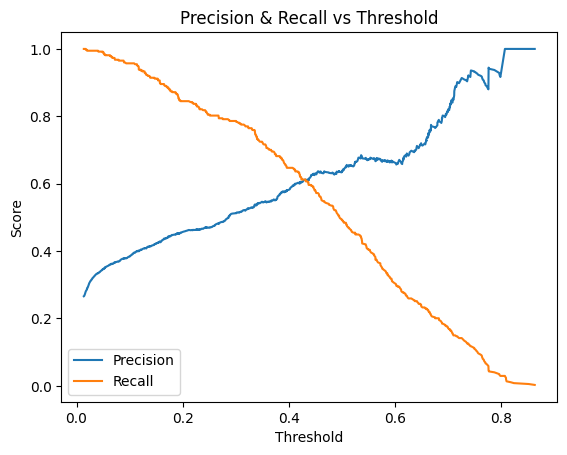

In [68]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

precision, recall, pr_thresholds = precision_recall_curve(y_test, xgb_test_proba)

plt.plot(pr_thresholds, precision[:-1], label="Precision")
plt.plot(pr_thresholds, recall[:-1], label="Recall")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.legend()
plt.title("Precision & Recall vs Threshold")
plt.show()

Finally the XGBoost model gave an optimal ROC-AUC score of 0.83 and good precision, recall and F1 scores.

In [71]:
#best threshold after threshold tuning
xgb_threshold_final=best_threshold_f1
print("Tuned XGBoost Test ROC-AUC:", xgb_test_auc)
xgb_test_pred = (xgb_test_proba >= xgb_threshold_final).astype(int)
cm = confusion_matrix(y_test, xgb_test_pred)
print("Confusion Matrix:\n", cm)
print(classification_report(y_test, xgb_test_pred))

Tuned XGBoost Test ROC-AUC: 0.8345364987498124
Confusion Matrix:
 [[779 254]
 [ 89 285]]
              precision    recall  f1-score   support

           0       0.90      0.75      0.82      1033
           1       0.53      0.76      0.62       374

    accuracy                           0.76      1407
   macro avg       0.71      0.76      0.72      1407
weighted avg       0.80      0.76      0.77      1407



#***Conclusion***

After comparing Logistic Regression and XGBoost models, and performing hyperparameter tuning for both, the models were evaluated using multiple performance metrics including ROC-AUC, precision, recall, and F1-score. The XGBoost model demonstrated superior overall performance, achieving an optimal ROC-AUC score of approximately 0.83 along with a well-balanced precision, recall, and F1-score. Based on these results, XGBoost was selected as the final model for churn prediction.